In [ ]:
# @title Global Variables
# path to papers
path_name = '/content/drive/MyDrive/Spoken vs Written/'
add_sent_length = True

time: 767 µs (started: 2024-03-29 20:32:46 +00:00)


In [ ]:
# @title Connection to Colab drive for data
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
time: 923 ms (started: 2024-03-29 20:32:47 +00:00)


In [ ]:
# @title Installations
!pip install -U scikit-learn

!pip install ipython-autotime
%load_ext autotime

!pip install -U imbalanced-learn

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 28 s (started: 2024-03-29 20:32:48 +00:00)


In [ ]:
# @title Imports
# File Reading
import os
import pathlib
import io

# Data Analytics suite
import numpy as np
import pandas as pd

# Plotting and Graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Math and Statistics
import math
import statistics
from statistics import mean
import scipy.stats as stats

# Random Forest import
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

# Random Undersampling
from imblearn.under_sampling import RandomUnderSampler

import nltk

# import functions to help with analysis of confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

time: 1.02 ms (started: 2024-03-29 20:33:16 +00:00)


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

time: 6.07 ms (started: 2024-03-29 20:33:16 +00:00)


In [ ]:
# @title Model Creation
param_grid = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}

# rf_100min_100max = RandomForestClassifier(max_depth=15, random_state=9)
rf_512min_512max = RandomForestClassifier(max_depth=15, random_state=9)
# grid_search = GridSearchCV(estimator = rf_512min_512max, param_grid=param_grid)
# rf_100min_512max = RandomForestClassifier(max_depth=15, random_state=9)

time: 871 µs (started: 2024-03-29 20:33:16 +00:00)


In [ ]:
# @title Data Reading

# df_100min_100max = pd.read_csv(path_name + 'speech_vs_written_min100_max100.csv')
df_512min_512max = pd.read_csv(path_name + 'speech_vs_written_min512_max512.csv')
# df_100min_512max = pd.read_csv(path_name + 'speech_vs_written_min100_max512.csv')

time: 415 ms (started: 2024-03-29 20:33:16 +00:00)


In [ ]:
# @title Add Average Sentence Length and Average Word Length.
def average_sentence_length(text):
  total_sent_length = 0
  num_sentences = 0

  sent_text = nltk.sent_tokenize(text)
  num_sentences = len(sent_text)

  for sentence in sent_text:
    total_sent_length += len(nltk.word_tokenize(sentence))
    # total_sent_length += len(sentence.split())

  return total_sent_length / num_sentences


def average_word_length(text):
  total_word_length = 0
  num_words = 0

  word_text = nltk.word_tokenize(text)
  num_words = len(word_text)

  for word in word_text:
    total_word_length = len(word)

  return total_word_length / num_words

time: 1.12 ms (started: 2024-03-29 20:33:16 +00:00)


In [ ]:
if add_sent_length:
  # df_100min_100max['avg_sent_len'] = [average_sentence_length(text) for text in df_100min_100max['text_chunk']]
  df_512min_512max['avg_sent_len'] = [average_sentence_length(text) for text in df_512min_512max['text_chunk']]
  # df_100min_512max['avg_sent_len'] = [average_sentence_length(text) for text in df_100min_512max['text_chunk']]

  # df_100min_100max['avg_word_len'] = [average_word_length(text) for text in df_100min_100max['text_chunk']]
  df_512min_512max['avg_word_len'] = [average_word_length(text) for text in df_512min_512max['text_chunk']]
  # df_100min_512max['avg_word_len'] = [average_word_length(text) for text in df_100min_512max['text_chunk']]

time: 1min 26s (started: 2024-03-29 20:33:16 +00:00)


In [ ]:
# sns.boxplot(x=df_100min_100max['type'], y=df_100min_100max['avg_sent_len']).set(title='Paper Types vs Automated Readability Index 100 min 100 max')

time: 398 µs (started: 2024-03-29 20:34:43 +00:00)


In [ ]:
# sns.boxplot(x=df_512min_512max['type'], y=df_512min_512max['avg_sent_len']).set(title='Paper Types vs Automated Readability Index 512 min 512 max')

time: 363 µs (started: 2024-03-29 20:34:43 +00:00)


In [ ]:
# sns.boxplot(x=df_100min_512max['type'], y=df_100min_512max['avg_sent_len']).set(title='Paper Types vs Automated Readability Index 512 min 512 max')

time: 392 µs (started: 2024-03-29 20:34:43 +00:00)


In [ ]:
# @title Feature Dropping
drop_features = ['ari', 'coleman_liau', 'dale_chall', 'difficult_words', 'flesch',
                 'fleschkincaid', 'gunning', 'hdd', 'herdanvm', 'linsear_write', 'simpsond',
                 'smog', 'text_standard', 'yulek', 'dugast', 'herdan', 'mattr', 'msttr', 'mtld',
                 'rttr', 'summer', 'ttr', 'yulei', 'maas']
df_512min_512max = df_512min_512max.drop(columns=drop_features)

time: 2.53 ms (started: 2024-03-29 20:34:43 +00:00)


In [ ]:
# Data and Labels Split
# df_100min_100max_data = df_100min_100max[df_100min_100max.columns.difference(['text_chunk', 'type'])]
# df_100min_100max_labels = df_100min_100max['type']

df_512min_512max_data = df_512min_512max[df_512min_512max.columns.difference(['text_chunk', 'type'])]
# df_512min_512max_labels = df_512min_512max['type']

# df_100min_512max_data = df_100min_100max[df_100min_512max.columns.difference(['text_chunk', 'type'])]
# df_100min_512max_labels = df_100min_512max['type']

time: 4.17 ms (started: 2024-03-29 20:34:43 +00:00)


In [ ]:
# print(len(df_100min_100max))

time: 371 µs (started: 2024-03-29 20:34:43 +00:00)


In [ ]:
# @title Removing Outliers

# We do this by removing everything that is outside of 3 standard deviations
# df_100min_100max = df_100min_100max[(np.abs(stats.zscore(df_100min_100max_data)) < 3).all(axis=1)]
df_512min_512max = df_512min_512max[(np.abs(stats.zscore(df_512min_512max_data)) < 3).all(axis=1)]
# df_100min_512max = df_100min_512max[(np.abs(stats.zscore(df_100min_512max_data)) < 3).all(axis=1)]

time: 9.55 ms (started: 2024-03-29 20:34:43 +00:00)


In [ ]:
# print(len(df_100min_100max))

time: 699 µs (started: 2024-03-29 20:34:43 +00:00)


In [ ]:
# @title Random Under Sampling
rus = RandomUnderSampler(random_state=9)
# X_100min_100max, labels_100min_100max = rus.fit_resample(df_100min_100max[df_100min_100max.columns.difference(['text_chunk', 'type'])],
#                      df_100min_100max['type'])
X_512min_512max, labels_512min_512max = rus.fit_resample(df_512min_512max[df_512min_512max.columns.difference(['text_chunk', 'type'])],
                     df_512min_512max['type'])
# X_100min_512max, labels_100min_512max = rus.fit_resample(df_100min_512max[df_100min_512max.columns.difference(['text_chunk', 'type'])],
#                      df_100min_512max['type'])

time: 27.2 ms (started: 2024-03-29 20:34:43 +00:00)


In [ ]:
# @title Train Test Split
# X_train_100min_100max, X_test_100min_100max, y_train_100min_100max, y_test_100min_100max = train_test_split(X_100min_100max, labels_100min_100max, test_size=0.2, random_state=9)

X_train_512min_512max, X_test_512min_512max, y_train_512min_512max, y_test_512min_512max = train_test_split(X_512min_512max, labels_512min_512max, test_size=0.2, random_state=9)

# X_train_100min_512max, X_test_100min_512max, y_train_100min_512max, y_test_100min_512max = train_test_split(X_100min_512max, labels_100min_512max, test_size=0.2, random_state=9)

time: 8.48 ms (started: 2024-03-29 20:34:43 +00:00)


In [ ]:
# sns.boxplot(x=df_100min_100max['type'], y=df_100min_100max['ari']).set(title='Paper Types vs Automated Readability Index 100 min 100 max')

time: 338 µs (started: 2024-03-29 20:34:43 +00:00)


[Text(0.5, 1.0, 'Type vs Average Word Length')]

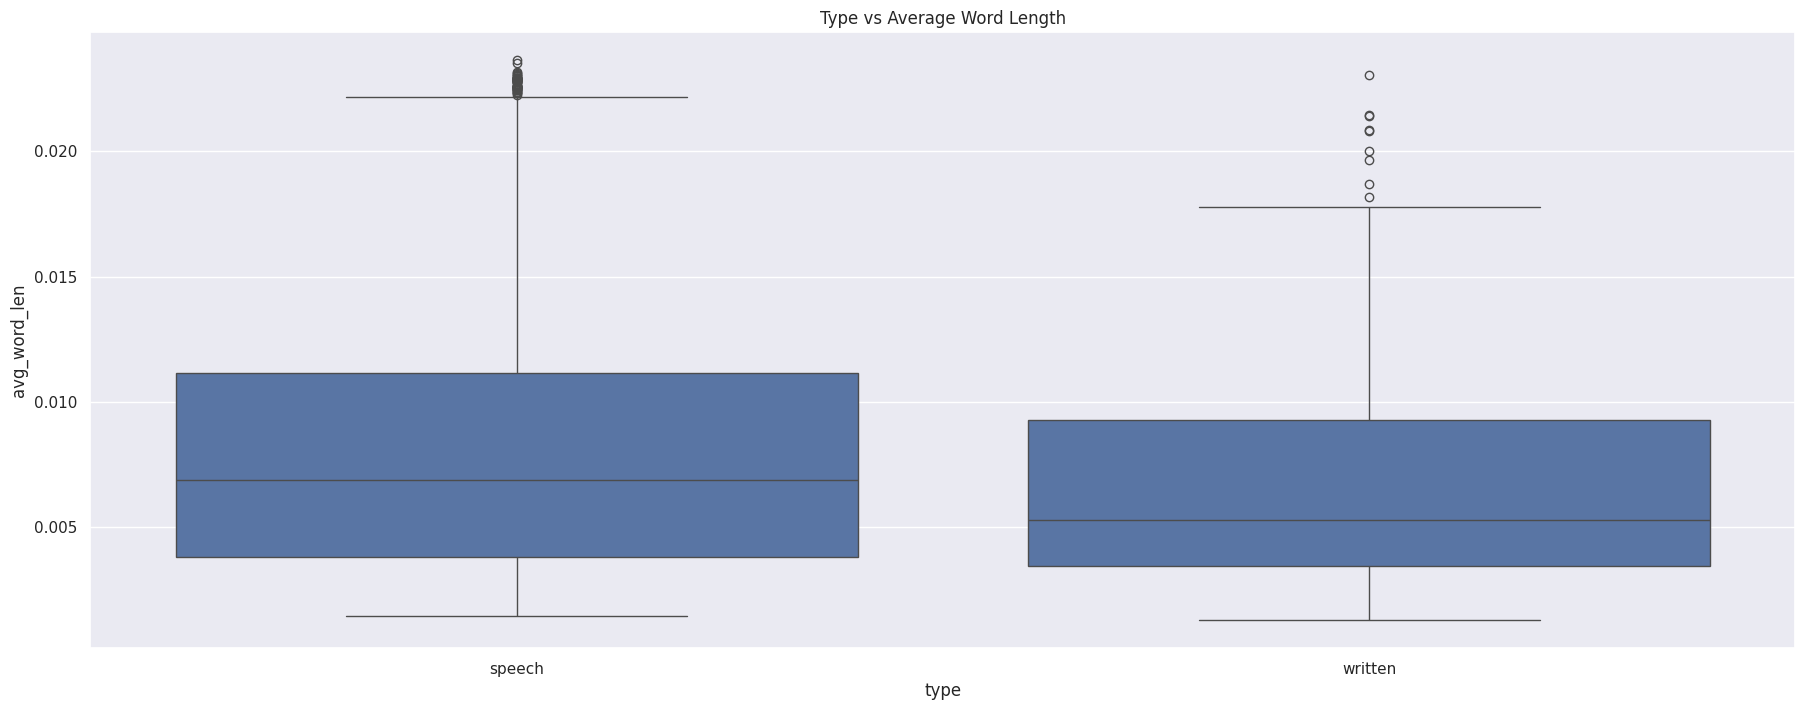

time: 384 ms (started: 2024-03-29 20:34:43 +00:00)


In [ ]:
sns.boxplot(x=df_512min_512max['type'], y=df_512min_512max['avg_word_len']).set(title='Type vs Average Word Length')

[Text(0.5, 1.0, 'Type vs Average Sentence Length')]

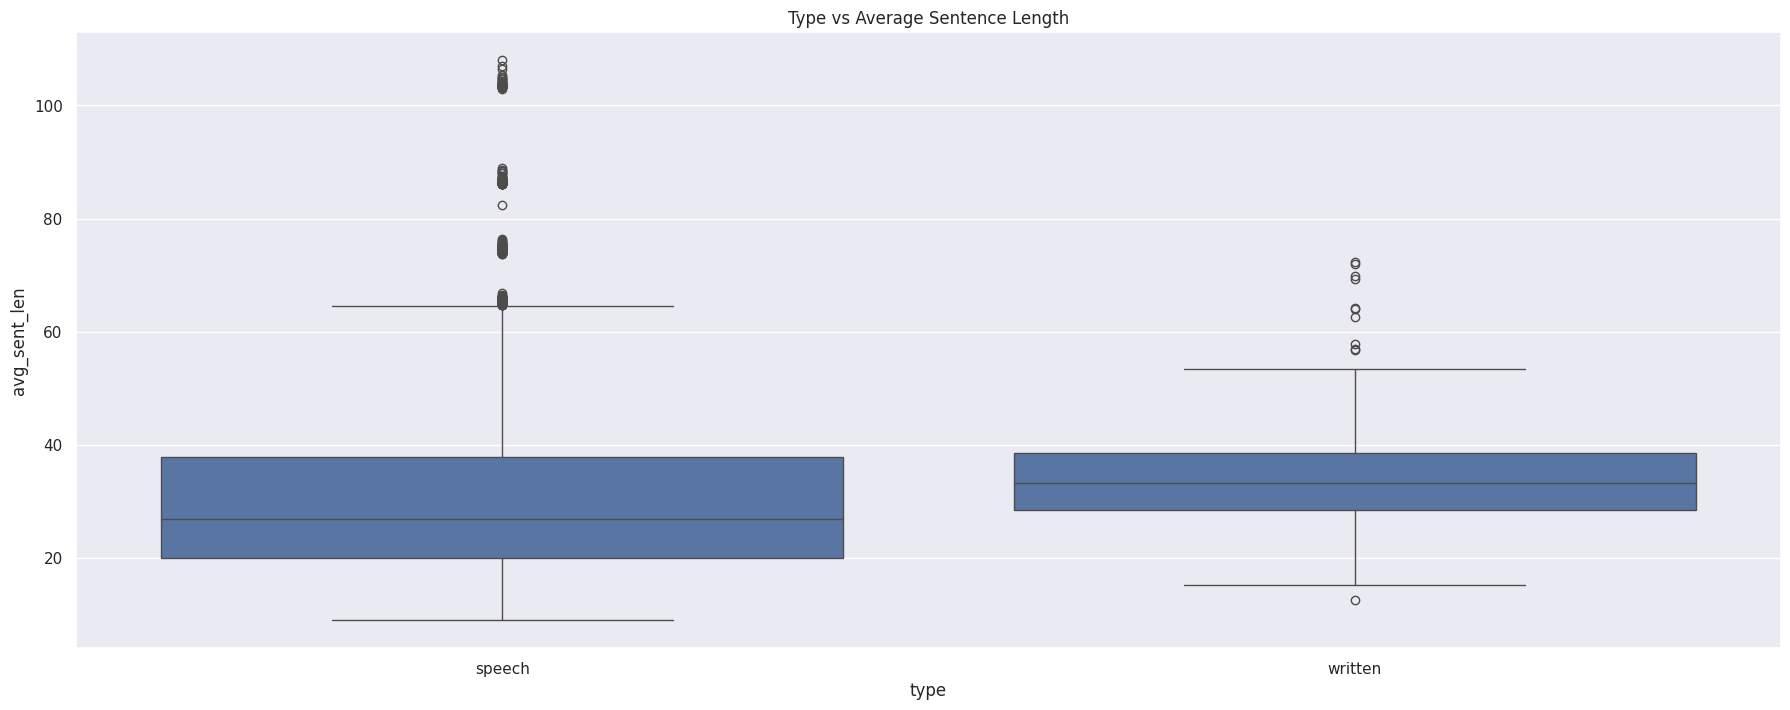

time: 582 ms (started: 2024-03-29 20:34:43 +00:00)


In [ ]:
sns.boxplot(x=df_512min_512max['type'], y=df_512min_512max['avg_sent_len']).set(title='Type vs Average Sentence Length')

In [ ]:
# sns.boxplot(x=df_512min_512max['type'], y=df_512min_512max['maas']).set(title='Type vs Average Sentence Length')

time: 358 µs (started: 2024-03-29 20:34:44 +00:00)


In [ ]:
# sns.boxplot(x=df_100min_512max['type'], y=df_100min_512max['ari']).set(title='Paper Types vs Automated Readability Index 512 min 512 max')

time: 521 µs (started: 2024-03-29 20:34:44 +00:00)


In [ ]:
# @title Model Fitting
# rf_100min_100max.fit(X_train_100min_100max, y_train_100min_100max)
# dt_100min_100max.fit(X_train_100min_100max, y_train_100min_100max)

rf_512min_512max.fit(X_train_512min_512max, y_train_512min_512max)
# grid_search.fit(X_train_512min_512max, y_train_512min_512max)
# rf_100min_512max.fit(X_train_100min_512max, y_train_100min_512max)


# rf_512min_512max.fit(df_512min_512max[df.columns.difference(['text_chunk', 'type'])],
#                      df_512min_512max['type'])
# rf_100min_512max.fit(df_100min_512max[df.columns.difference(['text_chunk', 'type'])],
#                      df_100min_512max['type'])

RandomForestClassifier(max_depth=15, random_state=9)

time: 203 ms (started: 2024-03-29 20:34:44 +00:00)


In [ ]:
# @title Model Evaluation
# rf_100min_100max.score(X_test_100min_100max, y_test_100min_100max)

time: 381 µs (started: 2024-03-29 20:34:44 +00:00)


In [ ]:
rf_512min_512max.score(X_test_512min_512max, y_test_512min_512max)

0.9291338582677166

time: 23.3 ms (started: 2024-03-29 20:34:44 +00:00)


In [ ]:
print(y_test_512min_512max.value_counts())

speech     71
written    56
Name: type, dtype: int64
time: 7.14 ms (started: 2024-03-29 20:38:58 +00:00)


<Axes: >

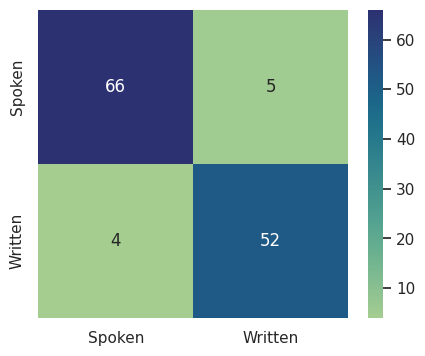

time: 320 ms (started: 2024-03-29 20:36:23 +00:00)


In [ ]:
rf_predict = rf_512min_512max.predict(X_test_512min_512max)
rf_cm = confusion_matrix(y_test_512min_512max, rf_predict)
plt.figure(figsize=(5, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='crest', xticklabels=['Spoken', 'Written'], yticklabels=['Spoken', 'Written'])

In [ ]:
# print(grid_search.best_params_)

time: 370 µs (started: 2024-03-29 20:34:45 +00:00)


In [ ]:
# rf_100min_512max.score(X_test_100min_512max, y_test_100min_512max)

time: 358 µs (started: 2024-03-29 20:34:45 +00:00)


# Feature Importance

In [ ]:
# rf_100min_100max.feature_importances_

time: 374 µs (started: 2024-03-29 20:34:45 +00:00)


In [ ]:
rf_512min_512max.feature_importances_

array([0.47926296, 0.52073704])

time: 15.2 ms (started: 2024-03-29 20:34:45 +00:00)


In [ ]:
# print(X_train_100min_100max.columns)

time: 361 µs (started: 2024-03-29 20:34:45 +00:00)


In [ ]:
# feature_importance_100min_100max_df = pd.DataFrame({'metric': X_train_100min_100max.columns, 'feature_importance': rf_100min_100max.feature_importances_})
# feature_importance_100min_100max_df = feature_importance_100min_100max_df.sort_values(by=['feature_importance'], ascending=False)

feature_importance_512min_512max_df = pd.DataFrame({'metric': X_train_512min_512max.columns, 'feature_importance': rf_512min_512max.feature_importances_})
feature_importance_512min_512max_df = feature_importance_512min_512max_df.sort_values(by=['feature_importance'], ascending=False)

# feature_importance_100min_512max_df = pd.DataFrame({'metric': X_train_100min_512max.columns, 'feature_importance': rf_100min_512max.feature_importances_})
# feature_importance_100min_512max_df = feature_importance_100min_512max_df.sort_values(by=['feature_importance'], ascending=False)

time: 17.3 ms (started: 2024-03-29 20:34:45 +00:00)


In [ ]:
sns.set(rc={'figure.figsize':(5,6)})

time: 1.76 ms (started: 2024-03-29 20:34:45 +00:00)


In [ ]:
# sns.barplot(x=feature_importance_100min_100max_df['feature_importance'],
#             y=feature_importance_100min_100max_df['metric']).set(ylabel="Feature",
#                                                                  xlabel="Feature Weight", title="Feature Importance (100min 100max)")

time: 403 µs (started: 2024-03-29 20:34:45 +00:00)


In [ ]:
print(feature_importance_512min_512max_df)

         metric  feature_importance
1  avg_word_len            0.520737
0  avg_sent_len            0.479263
time: 6.87 ms (started: 2024-03-29 20:34:45 +00:00)


<ipython-input-214-4402daf25764>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_512min_512max_df['feature_importance'],


[Text(0, 0.5, 'Feature'), Text(0.5, 0, 'Importance')]

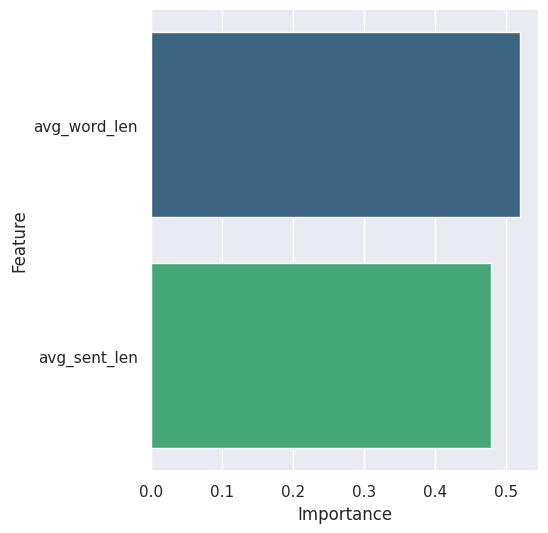

time: 354 ms (started: 2024-03-29 20:34:45 +00:00)


In [ ]:
sns.barplot(x=feature_importance_512min_512max_df['feature_importance'],
            y=feature_importance_512min_512max_df['metric'],
            palette="viridis").set(ylabel="Feature",
                  xlabel="Importance")

In [ ]:
# sns.barplot(x=feature_importance_100min_512max_df['feature_importance'],
#             y=feature_importance_100min_512max_df['metric']).set(ylabel="Feature",
#                                                                  xlabel="Feature Weight", title="Feature Importance (100min 512max)")

time: 381 µs (started: 2024-03-29 20:34:45 +00:00)


In [ ]:
# def hypothesis_test(group1, group2):
#   # Perform t-test
#   t_statistic, p_value = stats.ttest_ind(group1, group2)

#   # Output the results
#   print("T-statistic:", t_statistic)
#   print("P-value:", p_value)

#   # Interpret the results
#   alpha = 0.05  # significance level
#   if p_value < alpha:
#       print("Reject the null hypothesis: The means are significantly different.")
#   else:
#       print("Fail to reject the null hypothesis: There is not enough evidence to say that the means are different.")

time: 409 µs (started: 2024-03-29 20:34:45 +00:00)


In [ ]:
# @title Bopnferroni correction hypothesis test
def bonferroni_hypothesis_test(group1, group2):
  bf_dict = {'metric': [], 't_statistic': [], 'p_value': [], 'result': []}
  for column in group1.columns:
    bf_dict['metric'].append(column)
    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(group1[column], group2[column])
    bf_dict['t_statistic'].append(t_statistic)
    bf_dict['p_value'].append(p_value)

  # Interpret the results
  alpha = 0.05  # significance level
  alpha_corrected = alpha / len(bf_dict['metric'])
  for metric, t_statistic, p_value in zip(bf_dict['metric'], bf_dict['t_statistic'], bf_dict['p_value']):
    print("metric: ", metric)
    print("T-statistic", t_statistic)
    print("P-value:", p_value)
    if p_value < alpha_corrected:
        print("Reject the null hypothesis: The means are significantly different after Bonferroni correction.")
        bf_dict['result'].append("yes")
    else:
        bf_dict['result'].append("no")
        print("Fail to reject the null hypothesis: There is not enough evidence to say that the means are different after Bonferroni correction.")

    print()

  return pd.DataFrame(bf_dict)

time: 3.16 ms (started: 2024-03-29 20:34:45 +00:00)


In [ ]:
# @title Spoken and Written Splitting
# speech_100min_100max = df_100min_100max[df_100min_100max['type'] == 'speech']
# written_100min_100max = df_100min_100max[df_100min_100max['type'] == 'written']

speech_512min_512max = df_512min_512max[df_512min_512max['type'] == 'speech']
written_512min_512max = df_512min_512max[df_512min_512max['type'] == 'written']

# speech_100min_512max = df_100min_512max[df_100min_512max['type'] == 'speech']
# written_100min_512max = df_100min_512max[df_100min_512max['type'] == 'written']

time: 13.5 ms (started: 2024-03-29 20:34:45 +00:00)


In [ ]:
# @title Removing text and type
# speech_100min_100max = speech_100min_100max[speech_100min_100max.columns.difference(['text_chunk', 'type'])]
# written_100min_100max = written_100min_100max[written_100min_100max.columns.difference(['text_chunk', 'type'])]

speech_512min_512max = speech_512min_512max[speech_512min_512max.columns.difference(['text_chunk', 'type'])]
written_512min_512max = written_512min_512max[written_512min_512max.columns.difference(['text_chunk', 'type'])]

# speech_100min_512max = speech_100min_512max[speech_100min_512max.columns.difference(['text_chunk', 'type'])]
# written_100min_512max = written_100min_512max[written_100min_512max.columns.difference(['text_chunk', 'type'])]

time: 13.5 ms (started: 2024-03-29 20:34:45 +00:00)


In [ ]:
# hypothesis_test_100min_100max = bonferroni_hypothesis_test(speech_100min_100max, written_100min_100max)

time: 3.45 ms (started: 2024-03-29 20:34:45 +00:00)


In [ ]:
# @title Perfrom Hypothesis Test
hypothesis_test_512min_512max = bonferroni_hypothesis_test(speech_512min_512max, written_512min_512max)

metric:  avg_sent_len
T-statistic -4.250424672149385
P-value: 2.158794490966251e-05
Reject the null hypothesis: The means are significantly different after Bonferroni correction.

metric:  avg_word_len
T-statistic 3.7436755874365213
P-value: 0.00018266699157493935
Reject the null hypothesis: The means are significantly different after Bonferroni correction.

time: 18.9 ms (started: 2024-03-29 20:34:45 +00:00)


In [ ]:
# hypothesis_test_100min_512max = bonferroni_hypothesis_test(speech_100min_512max, written_100min_512max)

time: 362 µs (started: 2024-03-29 20:34:45 +00:00)


In [ ]:
print('100min 100max Reject')
# print(hypothesis_test_100min_100max[hypothesis_test_100min_100max['result'] == 'yes'][['metric', 'p_value']])

100min 100max Reject
time: 636 µs (started: 2024-03-29 20:34:45 +00:00)


In [ ]:
print('512min 512max Reject')
print(hypothesis_test_512min_512max[hypothesis_test_512min_512max['result'] == 'yes'][['metric', 'p_value']])

512min 512max Reject
         metric   p_value
0  avg_sent_len  0.000022
1  avg_word_len  0.000183
time: 28.5 ms (started: 2024-03-29 20:34:45 +00:00)


In [ ]:
print('100min 512max Reject')
# print(hypothesis_test_100min_512max[hypothesis_test_100min_512max['result'] == 'yes'][['metric', 'p_value']])

100min 512max Reject
time: 4.25 ms (started: 2024-03-29 20:34:45 +00:00)


In [ ]:
corr_matrix_512min_512max = df_512min_512max[df_512min_512max.columns.difference(['text_chunk', 'type'])].corr()

time: 7.76 ms (started: 2024-03-29 20:34:45 +00:00)


# Correlation Visualization

In [ ]:
# print(corr_matrix_512min_512max['ari']['ari'])
corr_features = {}
for feature in corr_matrix_512min_512max:
  corr_features[feature] = {}
  for key in corr_matrix_512min_512max.columns:
    if np.abs(corr_matrix_512min_512max[feature][key]) > 0.50:
      corr_features[feature][key] = corr_matrix_512min_512max[feature][key]

time: 6.66 ms (started: 2024-03-29 20:34:45 +00:00)


In [ ]:
print(corr_features)
for feature in corr_features:
  print(feature)
  for key in corr_features[feature]:
    print('\t', key)

{'avg_sent_len': {'avg_sent_len': 1.0}, 'avg_word_len': {'avg_word_len': 1.0}}
avg_sent_len
	 avg_sent_len
avg_word_len
	 avg_word_len
time: 7.71 ms (started: 2024-03-29 20:34:45 +00:00)


In [ ]:
sns.set(rc={'figure.figsize':(22,8)})

time: 4.56 ms (started: 2024-03-29 20:34:45 +00:00)


Text(240.046875, 0.5, '')

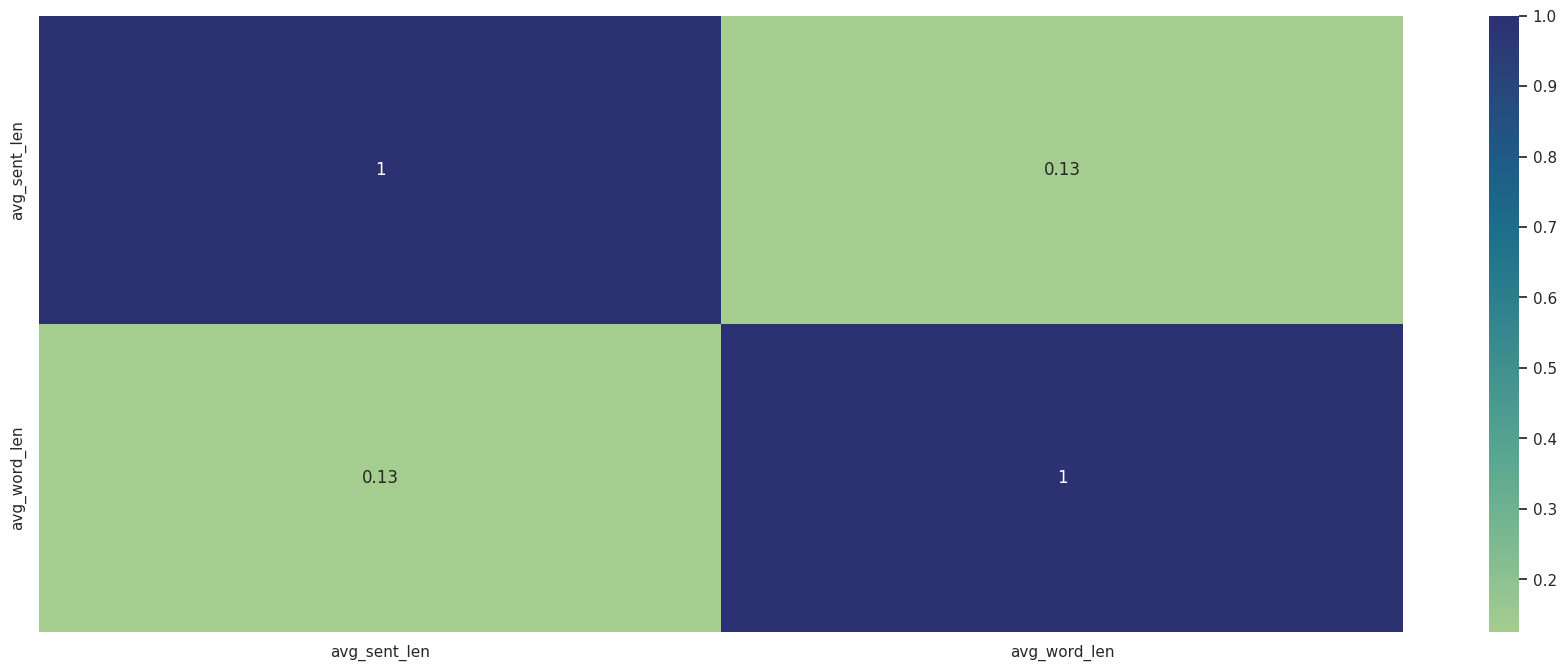

time: 697 ms (started: 2024-03-29 20:34:45 +00:00)


In [ ]:
heatmap = sns.heatmap(corr_matrix_512min_512max, annot=True, cmap='crest')

heatmap.set_title(heatmap.get_title(), fontsize=12)
heatmap.set_xlabel(heatmap.get_xlabel(), fontsize=20)
heatmap.set_ylabel(heatmap.get_ylabel(), fontsize=20)